In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
# report = pd.read_csv("../output/report/result_TRANSFER_logreg.csv")
report = pd.read_csv("../output/result/result_CASH_OUT_svc_linear.csv")
report

,class_weight,precision,recall,f1-score,false_positive_rate
0,1,0.800000,0.771475,0.785479,0.000355
1,2,0.706048,0.813614,0.756024,0.000624
2,3,0.636816,0.829822,0.720619,0.000872
3,4,0.586786,0.849271,0.694040,0.001101
4,5,0.637292,0.808752,0.712857,0.000848
...,...,...,...,...,...
507,508,0.048900,0.990276,0.093197,0.035474
508,509,0.048724,0.990276,0.092878,0.035608
509,510,0.048802,0.990276,0.093020,0.035548
510,511,0.048712,0.990276,0.092857,0.035617


In [4]:
plt.style.use("bmh")

In [5]:
import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [6]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "Arial"

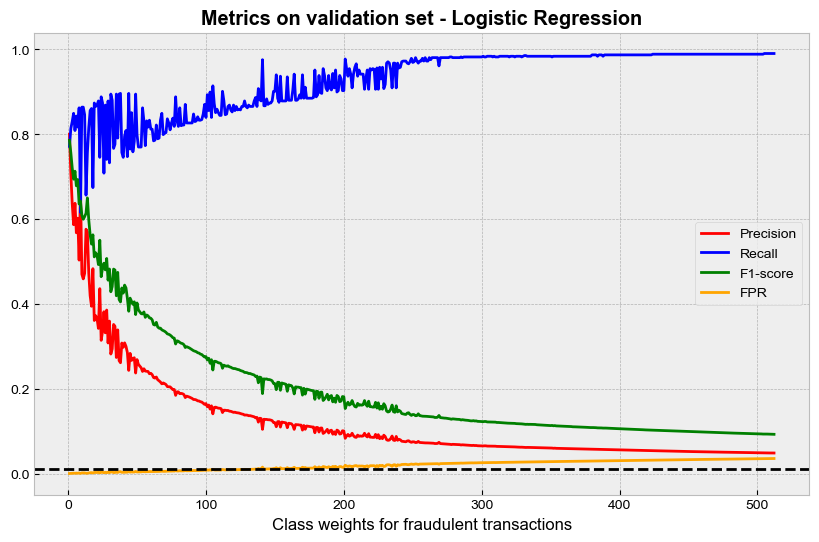

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(report.class_weight, report.precision, label="Precision", color="red")
ax.plot(report.class_weight, report.recall, label="Recall", color="blue")
ax.plot(report.class_weight, report["f1-score"], label="F1-score", color="green")

ax.plot(report.class_weight, report["false_positive_rate"], label="FPR", color="orange")
ax.axhline(0.01, linestyle="--", color="black")

ax.set_xlabel("Class weights for fraudulent transactions", fontweight="light")
ax.set_title("Metrics on validation set - Logistic Regression", fontweight="bold")

ax.legend()

In [8]:
fpr_less_1_pct = report[report["false_positive_rate"] <= 0.01]
fpr_less_1_pct

,class_weight,precision,recall,f1-score,false_positive_rate
0,1,0.800000,0.771475,0.785479,0.000355
1,2,0.706048,0.813614,0.756024,0.000624
2,3,0.636816,0.829822,0.720619,0.000872
3,4,0.586786,0.849271,0.694040,0.001101
4,5,0.637292,0.808752,0.712857,0.000848
...,...,...,...,...,...
124,125,0.141633,0.857374,0.243107,0.009570
125,126,0.140674,0.865478,0.242012,0.009737
126,127,0.139974,0.865478,0.240975,0.009794
128,129,0.138235,0.865478,0.238393,0.009937


In [9]:
fpr_less_1_pct.iloc[fpr_less_1_pct["f1-score"].argmax()]

class_weight           1.000000
precision              0.800000
recall                 0.771475
f1-score               0.785479
false_positive_rate    0.000355
Name: 0, dtype: float64

In [10]:
# PRECISION: Out of all predicted fraud, how many are actually fraud?
    # Good for UX, high precision ==> low FPR

# RECALL: Out of all actual fraud, how many were predicted fraud?
    # Good for financials, high recall ==> catch more fraud ==> save money.

In [11]:
ideal = fpr_less_1_pct.iloc[fpr_less_1_pct["recall"].argmax()]
ideal

class_weight           112.000000
precision                0.144004
recall                   0.901135
f1-score                 0.248325
false_positive_rate      0.009865
Name: 111, dtype: float64

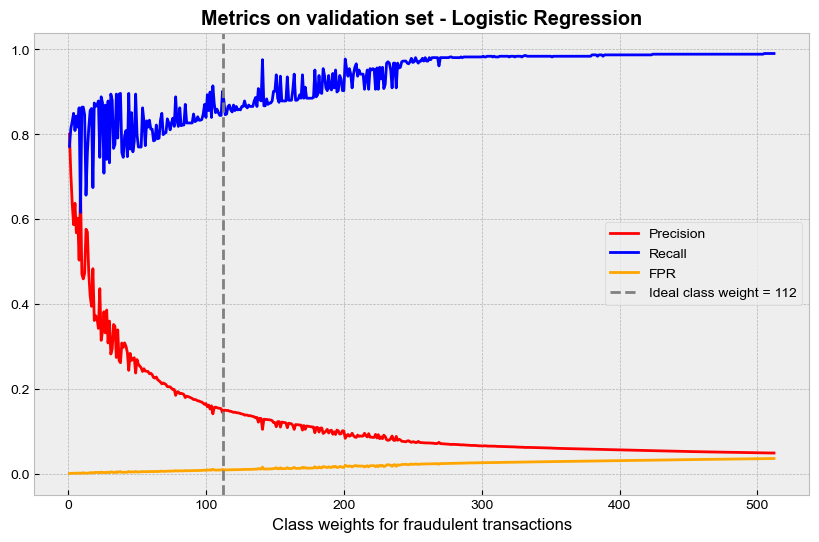

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(report.class_weight, report.precision, label="Precision", color="red")
ax.plot(report.class_weight, report.recall, label="Recall", color="blue")
# ax.plot(report.class_weight, report["f1-score"], label="F1-score", color="green")

ax.plot(report.class_weight, report["false_positive_rate"], label="FPR", color="orange")
# ax.axhline(0.01, linestyle="--", color="black")
ax.axvline(ideal.class_weight, linestyle="--", color="gray", label=f"Ideal class weight = {ideal.class_weight:.0f}")

ax.set_xlabel("Class weights for fraudulent transactions", fontweight="light")
ax.set_title("Metrics on validation set - Logistic Regression", fontweight="bold")

ax.legend()

In [19]:
icw_data = pd.read_csv("../output/result/result_ideal_class_weight.csv")
icw_data

,model_name,transaction_type,class_weight,precision,recall,f1-score,false_positive_rate
0,logreg,TRANSFER,14,0.824324,0.993485,0.901034,0.001639
1,logreg,CASH_OUT,124,0.156515,0.987034,0.270186,0.009797
2,svc_linear,TRANSFER,12,0.742092,0.993485,0.849582,0.002673
3,svc_linear,CASH_OUT,112,0.144004,0.901135,0.248325,0.009865


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
transaction_type = "TRANSFER"
model_name = "logreg"

In [22]:
icw = icw_data.query(
    f"model_name == '{model_name}' and transaction_type == '{transaction_type}'"
).iloc[0].class_weight

In [25]:
from sklearn.metrics import PrecisionRecallDisplay

In [27]:
transaction_types = {
    "CASH_OUT": {},
    "TRANSFER": {},
}
for transaction_type in transaction_types:
    transaction_types[transaction_type]["train"] = pd.read_csv(f"../datasets/03_features/{transaction_type}_train.csv", index_col=0)
    transaction_types[transaction_type]["val"] = pd.read_csv(f"../datasets/03_features/{transaction_type}_val.csv", index_col=0)
    transaction_types[transaction_type]["test"] = pd.read_csv(f"../datasets/03_features/{transaction_type}_test.csv", index_col=0)

train = transaction_types["TRANSFER"]["train"]
val = transaction_types["TRANSFER"]["val"]
test = transaction_types["TRANSFER"]["test"]

X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_val, y_val = val.iloc[:,:-1], val.iloc[:,-1]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]

In [36]:
from sklearn.svm import LinearSVC

import numpy as np
RNG = np.random.RandomState(10062930)

In [46]:
model_lr = LogisticRegression(class_weight={0: 1, 1: icw}, random_state=RNG)
model_svc = LinearSVC(
    class_weight={0: 1, 1: icw},
    tol=1e-5,
    max_iter=1000,
    dual=False,
    random_state=RNG,
)

models = {"logreg": model_lr, "svc_linear": model_svc}
for _, model in models.items():
    model.fit(X_train, y_train)

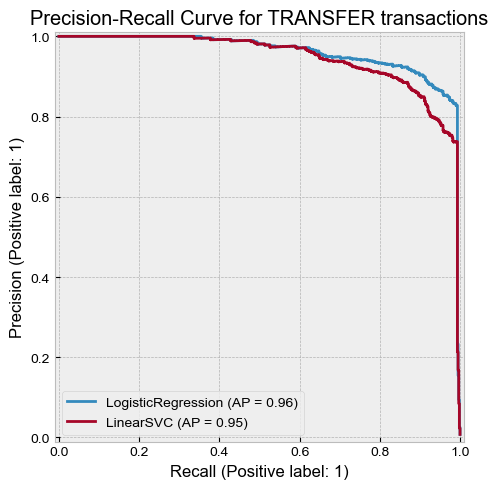

In [62]:
fig, ax = plt.subplots(figsize=(5, 5))

PrecisionRecallDisplay.from_estimator(models["logreg"], X_val, y_val, pos_label=1, ax=ax)
PrecisionRecallDisplay.from_estimator(models["svc_linear"], X_val, y_val, pos_label=1, ax=ax)

ax.set_title(f"Precision-Recall Curve for {transaction_type.upper()} transactions")

fig.tight_layout()